In [21]:
# Generador congruencial mixto y multiplicativo

from math import *

print ("Generador congruencial multiplicativo y mixto\n")
print ("Xn = (a*Xn-1+c)mod m\n")
print ("Advertencia: el valor m debe ser mayor a los otros\n")
a = int(input("Ingrese el valor de a: ")) #Escala lineal
c = int(input("c: ")) #Para GC multiplicativo, use c = 0
m = int(input("m: ")) #Módulo
X = int(input("Xo: ")) #Semilla

print ("n   Xn    Un")

n = 0
while True:
    U = X/m #Enésimo número aleatorio generado
    print (n, " ",X, " ",U)
    v = X
    X = (a*X+c)%m #Modelo lineal
    if (v==X): #Valida cuando en una posición indefinida se empiezan a repetir los números a período 1 (6, 1, 16, 2)
        break
    if (n==0): #En la primera iteración guarda el valor de Xo
        Rep = X #en esta variable
    if (n>0): #En esta iteración en adelante evalúa si se repite el Xo
        if Rep==X: #ya que Uo prácticamente no existe.
            break
    n = n + 1
    
    
print ("El período es de ", n)

Generador congruencial multiplicativo y mixto

Xn = (a*Xn-1+c)mod m

Advertencia: el valor m debe ser mayor a los otros

Ingrese el valor de a: 16
c: 4
m: 45
Xo: 1
n   Xn    Un
0   1   0.022222222222222223
1   20   0.4444444444444444
2   9   0.2
3   13   0.28888888888888886
4   32   0.7111111111111111
5   21   0.4666666666666667
6   25   0.5555555555555556
7   44   0.9777777777777777
8   33   0.7333333333333333
9   37   0.8222222222222222
10   11   0.24444444444444444
11   0   0.0
12   4   0.08888888888888889
13   23   0.5111111111111111
14   12   0.26666666666666666
15   16   0.35555555555555557
16   35   0.7777777777777778
17   24   0.5333333333333333
18   28   0.6222222222222222
19   2   0.044444444444444446
20   36   0.8
21   40   0.8888888888888888
22   14   0.3111111111111111
23   3   0.06666666666666667
24   7   0.15555555555555556
25   26   0.5777777777777777
26   15   0.3333333333333333
27   19   0.4222222222222222
28   38   0.8444444444444444
29   27   0.6
30   31   0.6888888

[0.4444444444444444, 0.2, 0.28888888888888886, 0.7111111111111111, 0.4666666666666667, 0.5555555555555556, 0.9777777777777777, 0.7333333333333333, 0.8222222222222222, 0.24444444444444444, 0.0, 0.08888888888888889, 0.5111111111111111, 0.26666666666666666, 0.35555555555555557, 0.7777777777777778, 0.5333333333333333, 0.6222222222222222, 0.044444444444444446, 0.8, 0.8888888888888888, 0.3111111111111111, 0.06666666666666667, 0.15555555555555556, 0.5777777777777777, 0.3333333333333333, 0.4222222222222222, 0.8444444444444444, 0.6, 0.6888888888888889, 0.1111111111111111, 0.8666666666666667, 0.9555555555555556, 0.37777777777777777, 0.13333333333333333, 0.2222222222222222, 0.6444444444444445, 0.4, 0.4888888888888889, 0.9111111111111111, 0.6666666666666666, 0.7555555555555555, 0.17777777777777778, 0.9333333333333333, 0.022222222222222223]

a: 16 
c: 4 
m: 45 
Xo: 1
El generador es de período completo


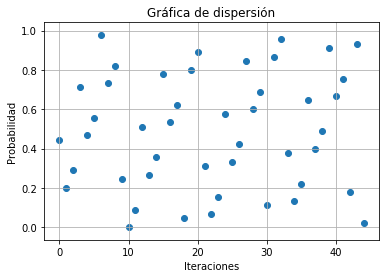

In [23]:
#Generador congruencial mixto y multiplicativo (función para implementar)

from pylab import *
import matplotlib.pyplot as plt
import numpy as np

def GCM(a, c, m, X):
    Xlist = []
    Xlist.append(X)
    U = []
    n = 0
    while True:
        U.append(Xlist[n]/m)
        v = Xlist[n]
        Xlist.append((a*Xlist[n]+c)%m)
        Rep = Xlist[1]
        if (n>1):
            if Rep==Xlist[n]:
                break
        n = n + 1
        if (v == Xlist[n]):
            break
    return U[1:n]


################################################
#Gráfica de uniformidad

VecU = []
a = 16
c =4
m = 45
X = 1
VecU = GCM (a, c, m, X)

print (VecU)

print ("\na:",a,"\nc:",c,"\nm:",m,"\nXo:",X)
if (m == len(VecU)):
    print ("El generador es de período completo")
else:
    print ("El generador NO es de período completo")

N = []
for i in range(len(VecU)):
    N.append(i)

plt.title ("Gráfica de dispersión")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.scatter(N, VecU)
plt.show()


In [46]:
#Método MidSquare

def MidSquare(num, n):
    
    for i in range(n):
    
        dig = str(num).__len__() #Cantidad de dígitos del número

        if (dig%2==0): #Si la cantidad de dígitos es par:

            num2 = num*num #Número al cuadrado
            dig2 = str(num2).__len__() #Cantidad de dígitos del número al cuadrado

            if (dig2%2!=0): #Rellenar con un 0 si la cantidad de dígitos del número al cuadrado es impar
                numcad = str(num2).zfill(dig2+1) #dig2+1 representa la cantidad de dígitos que tendrá el número (incluídos los 0's)
            else:
                numcad = str(num2)

            numfinal = numcad[int(dig/2):int(dig/2)+dig] #Recoge los números del medio; dig/2 representa el inicio del rango
                                                            #y dig/2+dig el final del rango
            u = int(numfinal)/(10**dig) #Número aleatorio final

            print (num, numcad, numfinal, u, sep="\t")
            num = int(numfinal) #Aquí es donde se hace que el ciclo se repita sucesivamente con el nuevo número

        else:
            return print ("%s no es un número par"% (num))

print ("\nXo","Xo^2","X1","U1", sep="\t" )
print ("\n")    

MidSquare(6300, 100)
#MidSquare (número par, iteraciones)


Xo	Xo^2	X1	U1


6300	39690000	6900	0.69
6900	47610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81
8100	65610000	6100	0.61
6100	37210000	2100	0.21
2100	04410000	4100	0.41
4100	16810000	8100	0.81

[0.69, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41]
[0.69, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.21, 0.41, 0.81, 0.61, 0.

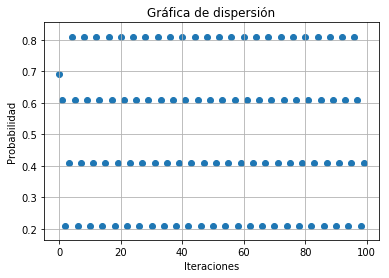

In [47]:
#MidSquare (función para implementar)

from pylab import *
import matplotlib.pyplot as plt
import numpy as np

def MidSquare(num, n):
    U = []
    for i in range(n):
        dig = str(num).__len__()
        if (dig%2==0):
            num2 = num*num
            dig2 = str(num2).__len__()
            if (dig2%2!=0):
                numcad = str(num2).zfill(dig2+1)
            else:
                numcad = str(num2)
            numfinal = numcad[int(dig/2):int(dig/2)+dig]
            num = int(numfinal)
            u = int(numfinal)/(10**dig)
            U.append(u)
    return U

        
print(MidSquare(6300, 100))

#########Gráfica de uniformidad########

N = []
Vector = MidSquare(6300, 100)
for i in range(len(Vector)):
    N.append(i)
print (Vector)
plt.title ("Gráfica de dispersión")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.scatter(N, Vector)
plt.show()